## Q1 Learn and understand Zipf’s Law

### Pick any file (or files) in NLTK package. Prove if Zipf’s Law works in Natural Language or not.

In [10]:
from nltk.corpus import gutenberg
import glob
import collections
import string
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

In [11]:
path = os.getcwd() + '/Input/chesterton*'
path = glob.glob(path)
path   #taking the gutenberg dataset - 3 chesterton books

['C:\\Users\\parit\\Documents\\PythonINFO7374\\PythonAssignments\\PythonForDataAnalysis\\Asgt2/Input\\chesterton-ball.txt',
 'C:\\Users\\parit\\Documents\\PythonINFO7374\\PythonAssignments\\PythonForDataAnalysis\\Asgt2/Input\\chesterton-brown.txt',
 'C:\\Users\\parit\\Documents\\PythonINFO7374\\PythonAssignments\\PythonForDataAnalysis\\Asgt2/Input\\chesterton-thursday.txt']

### Count words and save in a list of tuples

In [12]:
chesWords = gutenberg.words(path)
D = {}
for word in chesWords:        #Getting the word count for the above 3 books
    word = word.lower()
    if word in D:
        val = D[word]
        val = val + 1
        D[word] = val
    else:
        D[word] = 1
sortedDict = collections.OrderedDict(sorted(D.items(), key=lambda t: t[1],reverse = True)) 
sortedList = list(sortedDict.items())   #Sorting the (word,wordCount) tuple based on the count

### Save the word, rank and count in a csv file

In [13]:
with open('chestertonWordRanks.csv', 'w', newline = '') as outputFile:  #Creating a csv file with 'write' permission
    csvWriter = csv.writer(outputFile, delimiter = ',')
    rank = 0
    for wordCountTuple in sortedList:      #Calculating the word rank based on word count in the sorted list
        rank = rank + 1
        word = wordCountTuple[0]
        count = wordCountTuple[1]
        word = [c for c in word if c not in set(string.punctuation)]   #Removing all the punctuation marks
        if word:
            csvWriter.writerow((''.join(word), rank, count))


### Use the csv data to plot log-log graph

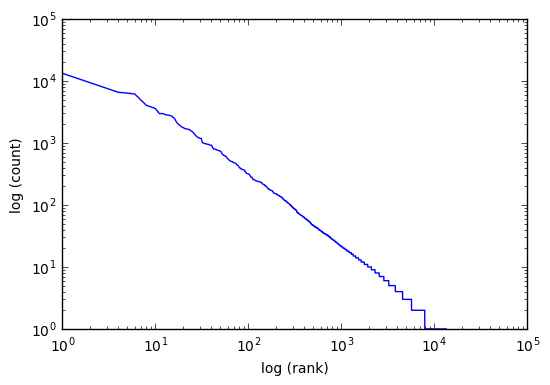

In [14]:
csvData = np.genfromtxt('chestertonWordRanks.csv', delimiter = ',')
x = csvData[:,1]
y = csvData[:,2]

plt.loglog(x, y, basex=np.e, basey=np.e)
axes = plt.axes()
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('log (rank)')
axes.set_ylabel('log (count)')
plt.show()

## In conclusion, looking at the loglog graph above, we can say that the natural language sample chosen (Chesterton books) obeys the Zipf's law.